## importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing dataset

In [2]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)
print(df)


                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


## Extracting x and y 

In [3]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


## Refining Data

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
#stopset = set(stopwords.words('english')) - set(('over', 'under', 'below', 'more', 'most', 'no', 'not', 'only', 'such', 'few', 'so', 'too', 'very', 'just', 'any', 'once'))# list will contain all the refined reviews

In [5]:
from stop_words import get_stop_words
from stop_words import safe_get_stop_words
for i in range(0,1000):
    review = df['Review'][i] # Collecting the reviews one by one
    review = re.sub('[^a-zA-z]', ' ', review) # replacing the punctuations with space
    review = review.lower() # converting all the characters into lower case
    review = review.split()
     # splitting word of the statement i.e converting a statement into list of words
    ps = PorterStemmer() # creating the object of the porter stemmer class
    # collecting the english language stop words
    all_stopwords = stopwords.words('english')
    all_stopwords +=safe_get_stop_words('unsupported language')
    # removing 'not' from the stopwords
    all_stopwords.remove('not')
   
    review =[ps.stem(word) for word in review if not word in set(all_stopwords)]
    # coverting the list of words back to statement
    #review = [ps.stem(word) for word in review if not word in stopset]
    # for this we will use the join function
    review = ' '.join(review)
    corpus.append(review) # collecting the refined reviews

In [6]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

## Creating a bag of words

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500) #min_df = 2, max_df = 0.8
# using the max_feature parameter of countVectorizer to limit the number of columns in x
x = cv.fit_transform(corpus).toarray()
y = df.iloc[:,-1].values
len(x[0])

1566

## Splitting Training and Testing data

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state = 79) 

## Applying PCA

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
x = pca.fit_transform(x)
print("variance ratio: ", pca.explained_variance_ratio_)

variance ratio:  [0.02540401 0.02172651]


In [10]:
# kernel PCA
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components = 3, kernel = 'linear',tol=0.1,alpha=2.0) #n_components=3 kernel='linear'
x = kpca.fit_transform(x)

## Creating and Training our Model

In [11]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
classifier= SVC(kernel='linear' , C=1000, gamma=1) 
model = BaggingClassifier( base_estimator=classifier, 
                                 bootstrap=True,
                                n_estimators =100, # number of SVC models to create
                                max_samples=220,# each model is trained from randomly sampled 220 instances 
                                random_state=49 
                               )
model.fit(x_train, y_train)



BaggingClassifier(base_estimator=SVC(C=1000, gamma=1, kernel='linear'),
                  max_samples=220, n_estimators=100, random_state=49)

## Predicting the output

In [12]:
y_pred_bagging = model.predict(x_test) # predicting

In [13]:
from sklearn import metrics
print("Accuracy:",format(metrics.accuracy_score(y_test, y_pred_bagging)*100,'.2f'))
print("Precision:",format(metrics.precision_score(y_test, y_pred_bagging)*100,'.2f'))
print("Recall:",format(metrics.recall_score(y_test, y_pred_bagging)*100,'.2f'))


Accuracy: 85.20
Precision: 86.21
Recall: 82.64


## Plotting Confusion matrix and Accuracy 

Accuracy score:  85.20


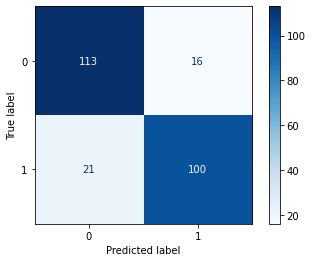

In [14]:
# plotting the confusion matrix and the accuracy score
from sklearn.metrics import plot_confusion_matrix, accuracy_score
plot_confusion_matrix(model, x_test, y_test,cmap= "Blues")
print('Accuracy score: ',format(accuracy_score(y_test,y_pred_bagging)*100,'.2f'))

## Visualising the output 

Percentage for default

1    50.0
0    50.0
Name: Liked, dtype: float64


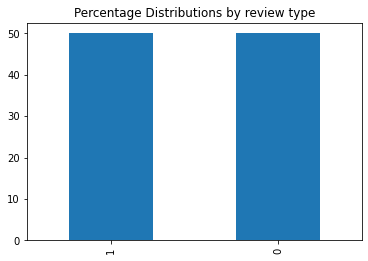

In [15]:
%matplotlib inline
print('Percentage for default\n')
print(round(df.Liked.value_counts(normalize=True)*100,2))
round(df.Liked.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

## AUC Curve

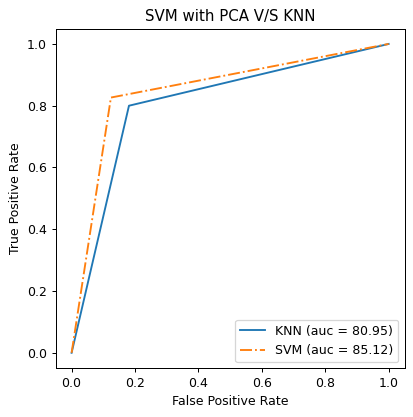

In [16]:
from sklearn.neighbors import KNeighborsClassifier
x_tr1,x_te1,y_tr1,y_te1 = train_test_split(x,y,train_size = 0.80, random_state = 124) #tr=0.71,ranst=13
classifier1 = KNeighborsClassifier(n_neighbors=3,metric='minkowski',leaf_size=1,p=1) #p=1
classifier1.fit(x,y)
y_pred = classifier1.predict(x_te1)
from sklearn.metrics import roc_curve, auc

knn_fpr, knn_tpr, threshold = roc_curve(y_te1, y_pred)
auc_knn = auc(knn_fpr, knn_tpr)*100

svm_fpr1, svm_tpr1, threshold = roc_curve(y_test, y_pred_bagging)
auc_svm1 = auc(svm_fpr1, svm_tpr1)*100

plt.figure(figsize=(5, 5), dpi=90)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN (auc = %0.2f)' % auc_knn)
plt.plot(svm_fpr1, svm_tpr1, linestyle='-.', label='SVM (auc = %0.2f)' % auc_svm1)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.title("SVM with PCA V/S KNN")
plt.show()
